In [1]:
from keras_facenet import FaceNet
import glob
import dlib
embedder = FaceNet()

In [2]:
faces_folder_path = r'testfaces/'

In [3]:
images = []
faces = 0 
delstore = []
facedet = []

for f in glob.glob(os.path.join(faces_folder_path, "*.jpg")):
    print("Processing file: {}".format(f))
    img = dlib.load_rgb_image(f)
    detections = embedder.extract(img, threshold=0.95)
    images.append(img)
    print("num faces found : ",len(detections))
    faces = faces + len(detections)
    for i in range(len(detections)):
        delstore.append(detections[i]['embedding'])
        facedet.append((img,detections[i]['box']))


Processing file: testfaces\dada1.jpg
num faces found :  1
Processing file: testfaces\dada10.jpg
num faces found :  1
Processing file: testfaces\dada2.jpg
num faces found :  1
Processing file: testfaces\dada3.jpg
num faces found :  1
Processing file: testfaces\dada4.jpg
num faces found :  1
Processing file: testfaces\dada5.jpg
num faces found :  1
Processing file: testfaces\dada6.jpg
num faces found :  1
Processing file: testfaces\dada7.jpg
num faces found :  1
Processing file: testfaces\dada8.jpg
num faces found :  1
Processing file: testfaces\dada9.jpg
num faces found :  1
Processing file: testfaces\dada_sachin.jpg
num faces found :  2
Processing file: testfaces\dada_sachin2.jpg
num faces found :  2
Processing file: testfaces\messi1.jpg
num faces found :  1
Processing file: testfaces\messi2.jpg
num faces found :  1
Processing file: testfaces\messi3.jpg
num faces found :  2
Processing file: testfaces\messi4.jpg
num faces found :  1
Processing file: testfaces\messi5.jpg
num faces found 

In [42]:
facedet[49][1]

[300, 49, 245, 350]

In [5]:
faces

50

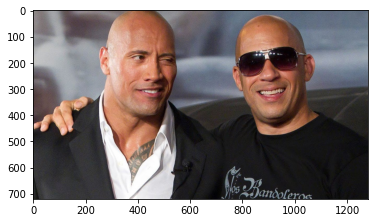

In [4]:
import cv2
import matplotlib.pyplot as plt
im = dlib.load_rgb_image(r'testfaces/vin_rock.jpg')
plt.imshow(im)
plt.show()

In [8]:
roi = im[facedet[48][1][1]:(facedet[48][1][1]+facedet[4][1][3]),facedet[48][1][0]:(facedet[48][1][0]+facedet[48][1][2])]

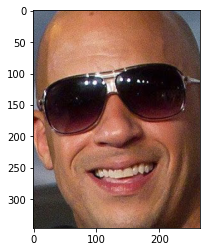

In [9]:
plt.imshow(roi)
plt.show()

In [82]:
delstorevec = []
for i in delstore:
    delstorevec.append(dlib.vector(i))



In [83]:
delstorevec[0].shape

(512, 1)

In [9]:
labels = dlib.chinese_whispers_clustering(delstorevec, 0.8)
num_classes = len(set(labels)) # Total number of clusters
print("Number of clusters: {}".format(num_classes))

Number of clusters: 9


In [71]:
from sklearn.cluster import KMeans

In [84]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(delstorevec)

In [85]:
labels_kmeans = kmeans.labels_

In [86]:
num_classes_k = len(set(labels_kmeans))

In [87]:
output_folder = r'output_kmeans_cluster/'
for i in range(len(labels_kmeans)):
    t = labels_kmeans[i] 
    output_folder_path = output_folder + '/output' + str(t) # Output folder for each cluster
    img = facedet[i][0]
    face = img[facedet[i][1][1]:(facedet[i][1][1]+facedet[i][1][3]),facedet[i][1][0]:(facedet[i][1][0]+facedet[i][1][2])]
    file_path = os.path.join(output_folder_path,"face_"+str(t)+"_"+str(i))+".jpg"
    cv2.imwrite(file_path,face)

In [78]:
output_folder = r'output_kmeans_cluster/'
for i in range(0, num_classes_k):
    output_folder_path = output_folder + '/output' + str(i)
    os.path.normpath(output_folder_path)
    os.makedirs(output_folder_path)